# Exploration of correlation between proficiency and comfort in subjects

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

In [21]:
data_dir = Path('data')
bg = pd.read_csv(data_dir / 'background-clean.csv')
interest = pd.read_csv(data_dir / 'interest-clean.csv')
metadata = pd.read_csv(data_dir / 'survey-metadata.csv')
print('background-clean rows,cols:', bg.shape)
print('interest-clean rows,cols:', interest.shape)
print('metadata rows,cols:', metadata.shape)
bg.head()

background-clean rows,cols: (51, 30)
interest-clean rows,cols: (52, 5)
metadata rows,cols: (34, 5)


,response_id,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num,dom,do_you_have_any_preference_regarding_working_on_an_industry_project_or_a_research_lab_project,...,LING104,LING110,LING111,CS130,CS165,ECON145,PSTAT127,PSTAT134,CS5,rsrch
0,1,adv,5,int,4,adv,5,9+,Yes,No preference,...,1,1,1,0,0,0,0,0,0,True
1,2,adv,5,int,4,adv,4,6-8,No,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True
2,3,adv,4,int,4,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
3,4,adv,4,int,3,adv,4,9+,No,I'm more interested in an industry project,...,0,0,0,1,1,0,0,0,0,False
4,6,int,3,int,3,int,3,6-8,Yes,I'm more interested in an industry project,...,0,0,0,0,0,0,0,0,0,True


The columns of interest are prog.prof, prog.comf, math.prof, math.comf, stat.prof, stat.comf

In [52]:
cols = ['prog.prof', 'prog.comf', 'math.prof', 'math.comf', 'stat.prof', 'stat.comf', 'updv.num']
bg_clean = bg[cols].copy()
bg_clean.head()

,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num
0,adv,5,int,4,adv,5,9+
1,adv,5,int,4,adv,4,6-8
2,adv,4,int,4,adv,4,9+
3,adv,4,int,3,adv,4,9+
4,int,3,int,3,int,3,6-8


I want to look for correlation, so I will map proficiency columns to integer values. RUN BELOW CELL ONLY ONCE

In [53]:
prof_map = {
    'adv': 3,
    'int': 2,
    'beg': 1
}

prof_cols = [col for col in bg_clean.columns if col.endswith('.prof')]

bg_numeric = bg_clean.copy()
for col in prof_cols:
    bg_numeric[col] = bg_numeric[col].map(prof_map)

bg_numeric

,prog.prof,prog.comf,math.prof,math.comf,stat.prof,stat.comf,updv.num
0,3,5,2,4,3,5,9+
1,3,5,2,4,3,4,6-8
2,3,4,2,4,3,4,9+
3,3,4,2,3,3,4,9+
4,2,3,2,3,2,3,6-8
5,2,3,3,5,3,5,6-8
6,2,3,2,3,2,3,6-8
7,2,4,3,4,3,5,3-5
8,2,4,2,4,3,4,9+
9,2,4,2,4,1,3,0-2


## Subquestion Structure:

### 1. Histograms of proficiency and comfort

### 2. Scatterplots + line of best fit

### 3. Analysis of correlation

1a. Comfort level histograms

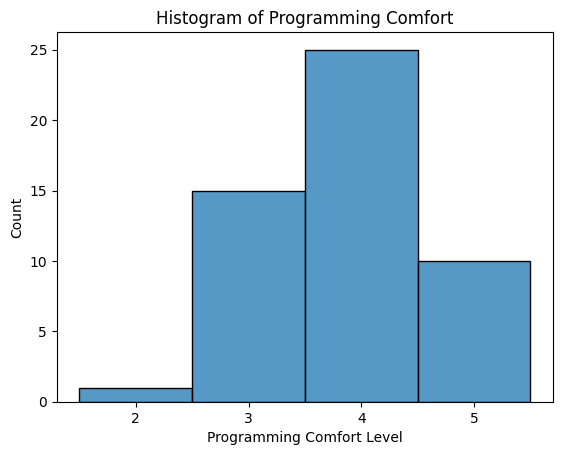

In [82]:

plt.figure()
sns.histplot(bg_numeric['prog.comf'].dropna(), discrete=True)
plt.title('Histogram of Programming Comfort')
plt.xlabel('Programming Comfort Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['prog.comf'].dropna().unique()))
plt.show()

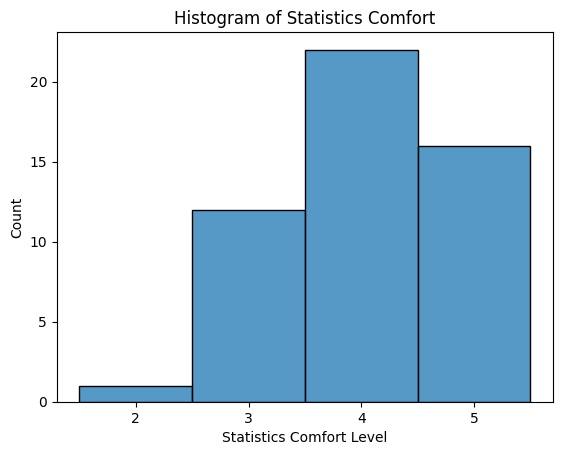

In [83]:

plt.figure()
sns.histplot(bg_numeric['stat.comf'].dropna(), discrete=True)
plt.title('Histogram of Statistics Comfort')
plt.xlabel('Statistics Comfort Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['stat.comf'].dropna().unique()))
plt.show()

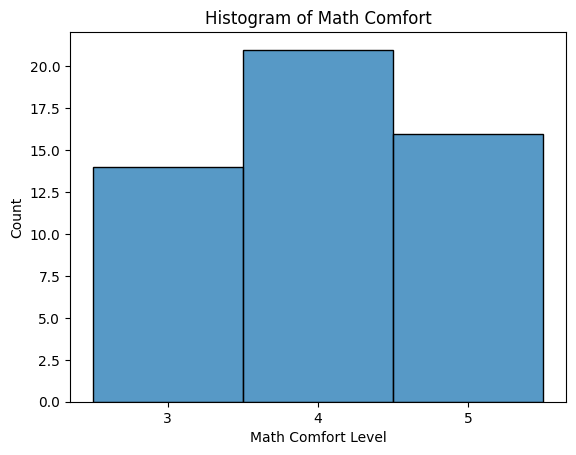

In [84]:
plt.figure()
sns.histplot(bg_numeric['math.comf'].dropna(), discrete=True)
plt.title('Histogram of Math Comfort')
plt.xlabel('Math Comfort Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['math.comf'].dropna().unique()))
plt.show()

Now let's look at the distributions of proficiency levels

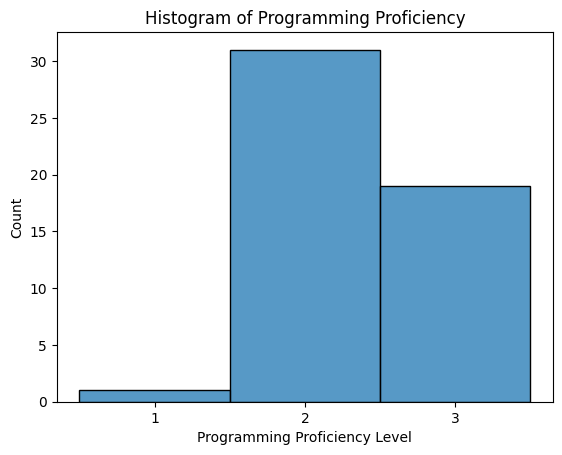

In [56]:
plt.figure()
sns.histplot(bg_numeric['prog.prof'].dropna(), discrete=True)
plt.title('Histogram of Programming Proficiency')
plt.xlabel('Programming Proficiency Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['prog.prof'].dropna().unique()))
plt.show()

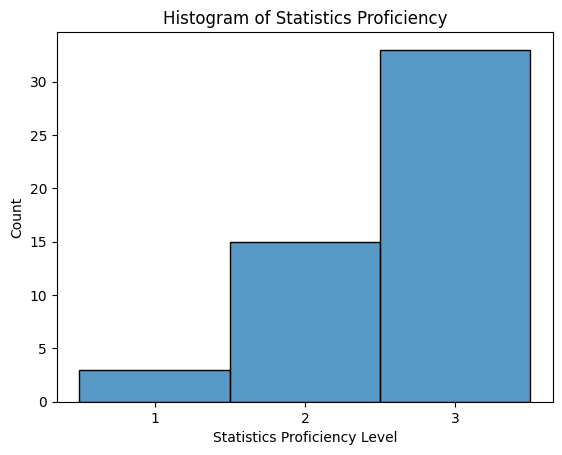

In [85]:
plt.figure()
sns.histplot(bg_numeric['stat.prof'].dropna(), discrete=True)
plt.title('Histogram of Statistics Proficiency')
plt.xlabel('Statistics Proficiency Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['stat.prof'].dropna().unique()))
plt.show()

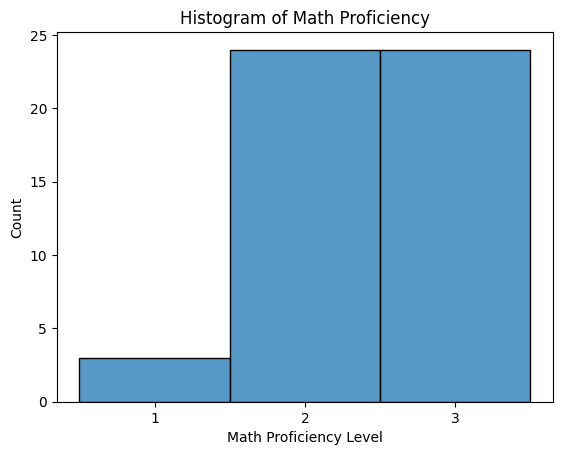

In [86]:
plt.figure()
sns.histplot(bg_numeric['math.prof'].dropna(), discrete=True)
plt.title('Histogram of Math Proficiency')
plt.xlabel('Math Proficiency Level')
plt.ylabel('Count')
plt.xticks(sorted(bg_numeric['math.prof'].dropna().unique()))
plt.show()

Now let's analyze the relationship between proficiency and comfort levels within each subject

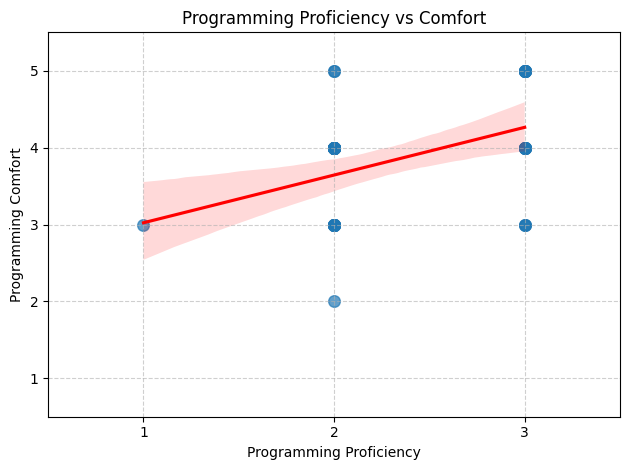

In [87]:
plt.figure()
sns.regplot(
    data=bg_numeric,
    x='prog.prof',
    y='prog.comf',
    scatter_kws={'alpha': 0.7, 's': 70}, #transparency and point size
    line_kws={'color': 'red'}
)

plt.title("Programming Proficiency vs Comfort")
plt.xlabel("Programming Proficiency")
plt.ylabel("Programming Comfort")

plt.xticks([1, 2, 3])
plt.yticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 5.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

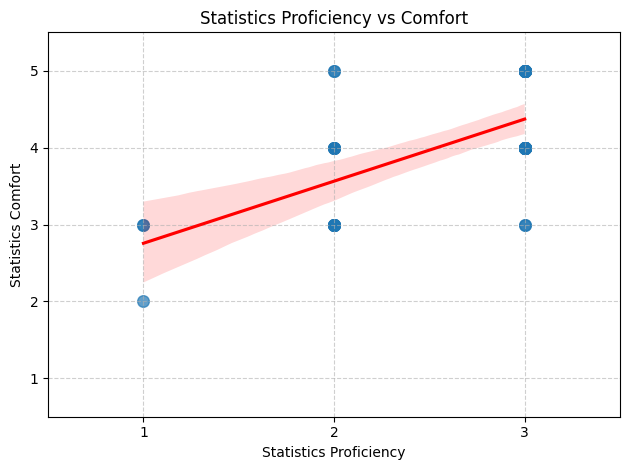

In [88]:
plt.figure()
sns.regplot(
    data=bg_numeric,
    x='stat.prof',
    y='stat.comf',
    scatter_kws={'alpha': 0.7, 's': 70}, #transparency and point size
    line_kws={'color': 'red'}
)

plt.title("Statistics Proficiency vs Comfort")
plt.xlabel("Statistics Proficiency")
plt.ylabel("Statistics Comfort")

plt.xticks([1, 2, 3])
plt.yticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 5.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

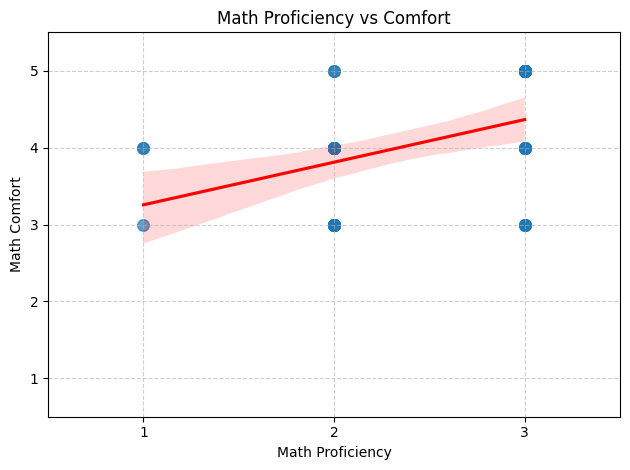

In [89]:
plt.figure()
sns.regplot(
    data=bg_numeric,
    x='math.prof',
    y='math.comf',
    scatter_kws={'alpha': 0.7, 's': 70}, #transparency and point size
    line_kws={'color': 'red'}
)

plt.title("Math Proficiency vs Comfort")
plt.xlabel("Math Proficiency")
plt.ylabel("Math Comfort")

plt.xticks([1, 2, 3])
plt.yticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 3.5)
plt.ylim(0.5, 5.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Now let's intereret these results

In [91]:
from scipy import stats

prog_slope, prog_intercept, prog_r_value, prog_p_value, prog_std_err = stats.linregress(bg_numeric['prog.prof'], bg_numeric['prog.comf'])
math_slope, math_intercept, math_r_value, math_p_value, math_std_err = stats.linregress(bg_numeric['math.prof'], bg_numeric['math.comf'])
stat_slope, stat_intercept, stat_r_value, stat_p_value, stat_std_err = stats.linregress(bg_numeric['stat.prof'], bg_numeric['stat.comf'])

Using the stats tool from the scipy package, we can easily get the slope, intercept, correlation coefficient (r-value), p-value, and standard error. 

In [94]:
print("Programming Proficiency vs Comfort Correlation Data:")
print(f"Slope: {prog_slope:.3f}")
print(f"Intercept: {prog_intercept:.3f}")
print(f"Correlation coefficient (r-value): {prog_r_value:.3f}")
print(f"P-value: {prog_p_value:.5f}")
print(f"Standard error: {prog_std_err:.3f}")

print("\nMath Proficiency vs Comfort Correlation Data:")
print(f"Slope: {math_slope:.3f}")
print(f"Intercept: {math_intercept:.3f}")
print(f"Correlation coefficient (r-value): {math_r_value:.3f}")
print(f"P-value: {math_p_value:.5f}")
print(f"Standard error: {math_std_err:.3f}")

print("\nStatistics Proficiency vs Comfort Correlation Data:")
print(f"Slope: {stat_slope:.3f}")
print(f"Intercept: {stat_intercept:.3f}")
print(f"Correlation coefficient (r-value): {stat_r_value:.3f}")
print(f"P-value: {stat_p_value:.10f}")
print(f"Standard error: {stat_std_err:.3f}")

Programming Proficiency vs Comfort Correlation Data:
Slope: 0.621
Intercept: 2.402
Correlation coefficient (r-value): 0.433
P-value: 0.00150
Standard error: 0.185

Math Proficiency vs Comfort Correlation Data:
Slope: 0.554
Intercept: 2.702
Correlation coefficient (r-value): 0.434
P-value: 0.00145
Standard error: 0.164

Statistics Proficiency vs Comfort Correlation Data:
Slope: 0.808
Intercept: 1.949
Correlation coefficient (r-value): 0.612
P-value: 0.0000017873
Standard error: 0.149



#### Hypotheses:
- H_0: There is no relationship between reported proficiency and reported comfort in a given subject.

- H_A: There exists a relationship between reported proficiency and reported comfort in a given subject.

#### Analysis
Our analysis shows positive correlations between proficiency and comfort in all subjects. Programming, math, and statistics had slopes of 0.61, 0.55, and 0.8 respectively. These slopes mean that for every unit increase in reported proficiency, there is an expected x unit increase in reported comfort. Correlations coefficients for programming, math, and statistics were 0.43, 0.43, and 0.6. These coefficients mean that there is a moderate positive correlation between the reported proficiency and reported comfort in a given subject. P-values for these regression lines range from 0.0015 to 0.0000018, showing statistically significant correlations at alpha values well below a = 0.01. This means we can reject the null hypothesis, and conclude that there exists a statistically significant positive correlation between the reported proficiency and reported comfort in a given subject at alpha = 0.01.
